## 07. R 벡터데이터

In [1]:
library(tmap)
library(sf)
library(spdep)

Linking to GEOS 3.9.3, GDAL 3.5.2, PROJ 8.2.1; sf_use_s2() is TRUE

Loading required package: sp

Loading required package: spData



#### 07-1. tmap 기초

Reading layer `SIG_june2022_01' from data source 
  `C:\Users\82107\Documents\GitHub\2023GIScosm\data\chap07\SIG_june2022_01.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 250 features and 3 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 746111 ymin: 1458650 xmax: 1387820 ymax: 2068441
Projected CRS: Korea 2000 / Unified CS
Reading layer `ADM_june2022_01' from data source 
  `C:\Users\82107\Documents\GitHub\2023GIScosm\data\chap07\ADM_june2022_01.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 3518 features and 3 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 746255.1 ymin: 1458650 xmax: 1303990 ymax: 2068441
Projected CRS: Korea 2000 / Unified CS


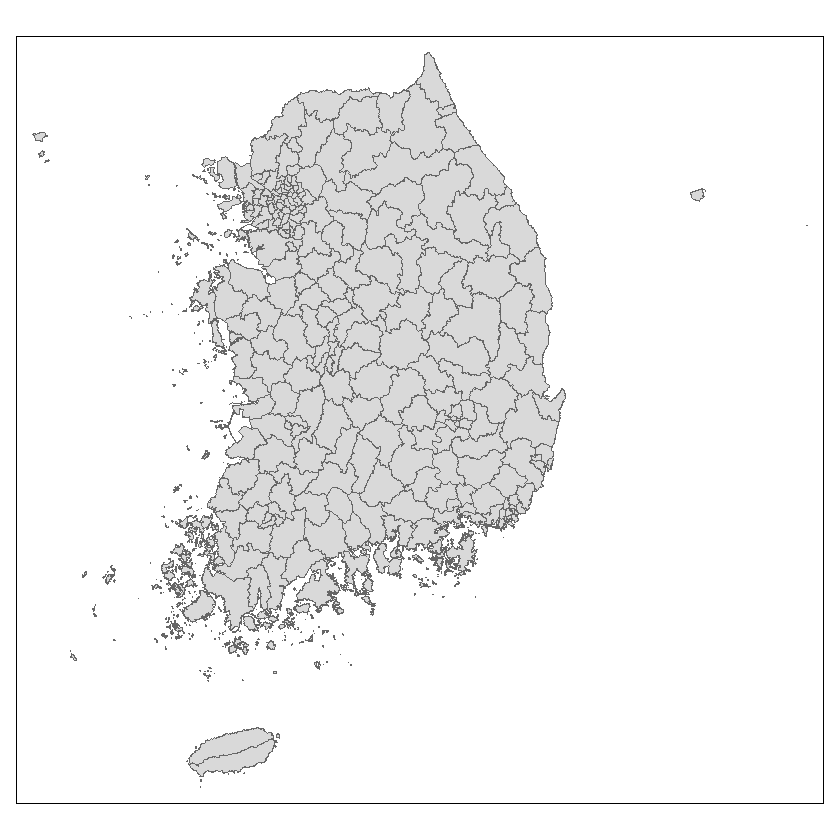

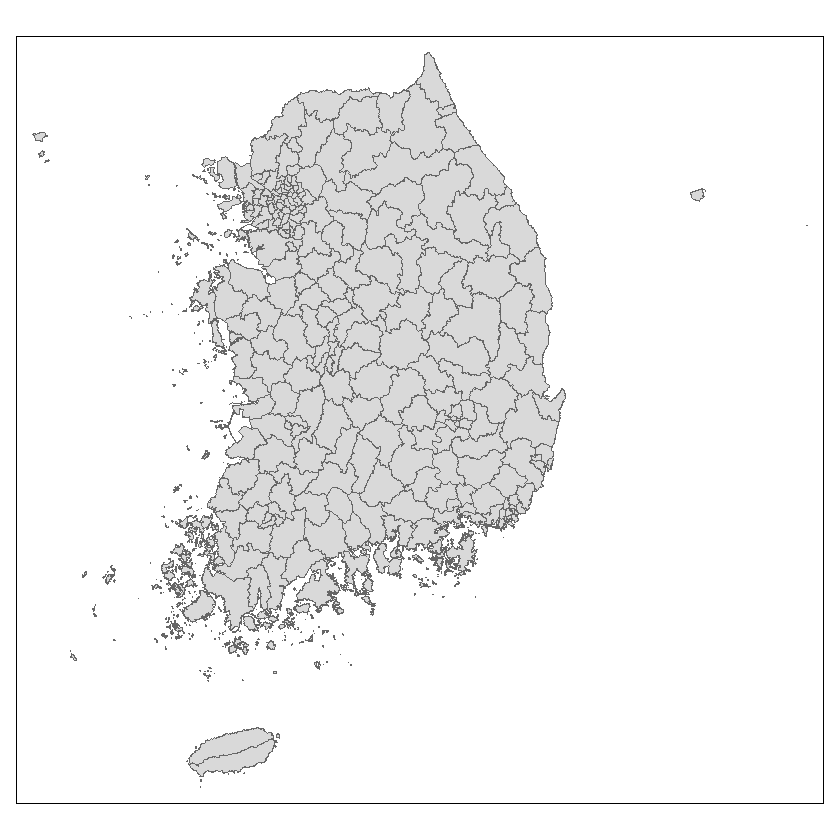

In [4]:
shp1<-st_read("./data/chap07/SIG_june2022_01.shp") #시군구 벡터 파일
tm_shape(shp1)+tm_fill()+tm_borders() #출력
shp2<-st_read("./data/chap07/ADM_june2022_01.shp") #읍면동 벡터 파일
tm_shape(shp1)+tm_fill()+tm_borders() #출력

#### 07-2. 벡터데이터 공간처리

Registered S3 method overwritten by 'geojsonsf':
  method        from   
  print.geojson geojson



,BASE_DATE,SIGUNGU_CD,SIGUNGU_NM,geometry
,<chr>,<chr>,<chr>,<MULTIPOLYGON [m]>
22,20220630,11220,서초구,MULTIPOLYGON (((956577.8 19...
23,20220630,11230,강남구,MULTIPOLYGON (((960789.1 19...
24,20220630,11240,송파구,MULTIPOLYGON (((968636.6 19...


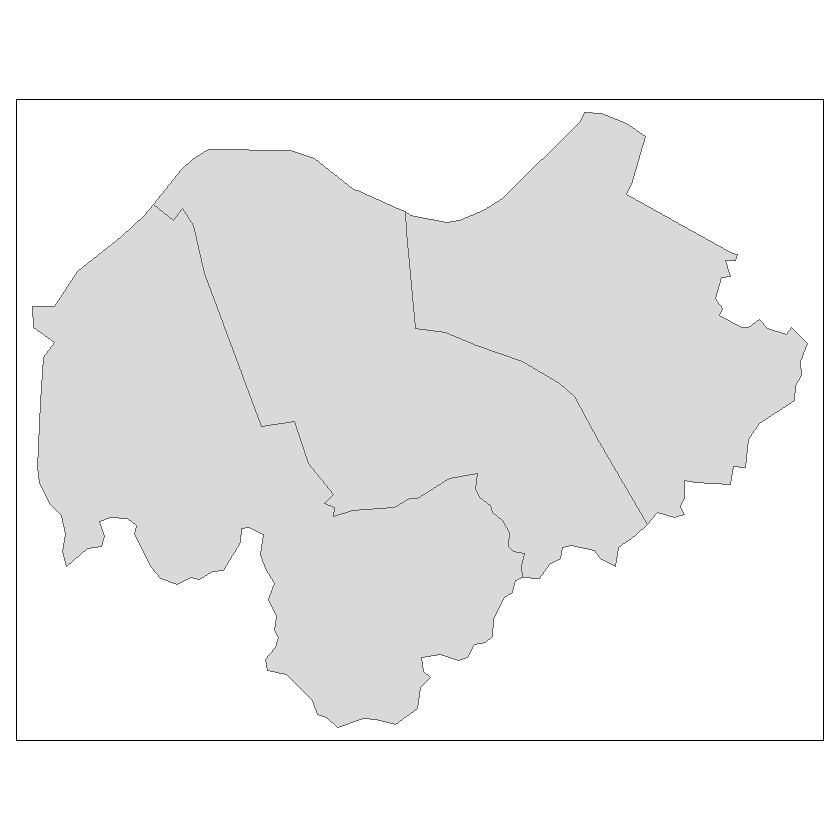

In [5]:
#부분추출
shp1_1 <- shp1[which(shp1$SIGUNGU_NM %in% c("강남구", "서초구", "송파구")), ]
tm_shape(shp1_1)+tm_fill()+tm_borders() #출력
shp1_1

In [7]:
pnt1 <- st_read("./data/chap07/seoul_subway_lift2.shp", stringsAsFactors=FALSE, options="ENCODING=949")

options:        ENCODING=949 
Reading layer `seoul_subway_lift2' from data source 
  `C:\Users\82107\Documents\GitHub\2023GIScosm\data\chap07\seoul_subway_lift2.shp' 
  using driver `ESRI Shapefile'


#### 07-7. 공간적 자기상관성(Moran's I/LISA)

Warning message in st_centroid.sf(shp1):
"st_centroid assumes attributes are constant over geometries of x"


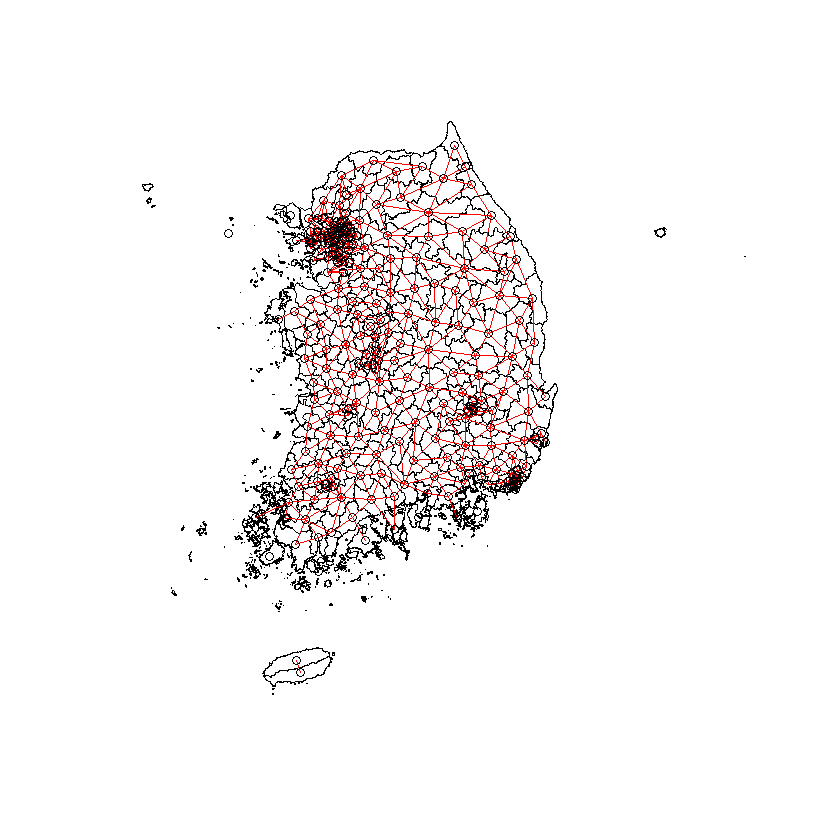

In [32]:
nb1<-poly2nb(shp1, queen=TRUE)
nb2<-poly2nb(shp2, queen=TRUE)
lw1<-nb2listw(nb1, style="W", zero.policy=TRUE)
lw2<-nb2listw(nb2, style="W", zero.policy=TRUE)
plot(shp1$geom)
plot(lw1, st_coordinates(st_centroid(shp1)), add=TRUE, col='red')

Warning message in st_centroid.sf(shp2):
"st_centroid assumes attributes are constant over geometries of x"


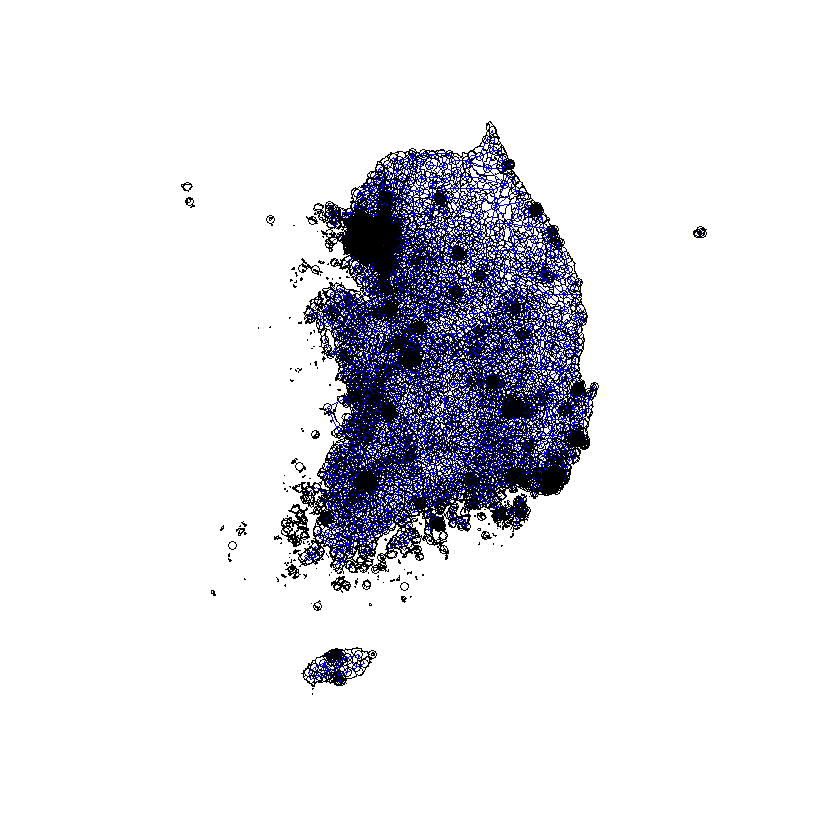

In [12]:
plot(shp2$geom)
plot(lw2, st_coordinates(st_centroid(shp2)), add=TRUE, col='blue')